In [1]:
import os
import random
import numpy as np
import pandas as pd

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

from tqdm import tqdm
import re

import tensorflow as tf

#Si vous n'avez pas de GPU ou que vous ne voulez pas l'utiliser, commentez les 2 lignes suivantes
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image    
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras

LE = LabelEncoder()

from PIL import Image
# from tensorflow.keras.utils import plot_model

2.4.1


In [3]:
os.environ['TF_DETERMINISTIC_OPS'] = '1' #  c'est la ligne la plus importante
os.environ['PYTHONHASHSEED'] = '42'
os.environ['CUDA_VISIBLE_DEVICES'] = '' #  c'est facultatif
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
race_dirs = os.listdir('../data/train')
race_dirs

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [11]:
all_images_path = []
for i in race_dirs:
    folder_path = '../data/train/' + i + '/'
    for u in os.listdir(folder_path):
        all_images_path.append(folder_path + u)
        
print(all_images_path)

['../data/train/n02085620-Chihuahua/n02085620_10074.jpg', '../data/train/n02085620-Chihuahua/n02085620_10131.jpg', '../data/train/n02085620-Chihuahua/n02085620_10976.jpg', '../data/train/n02085620-Chihuahua/n02085620_11140.jpg', '../data/train/n02085620-Chihuahua/n02085620_11238.jpg', '../data/train/n02085620-Chihuahua/n02085620_11258.jpg', '../data/train/n02085620-Chihuahua/n02085620_11337.jpg', '../data/train/n02085620-Chihuahua/n02085620_11477.jpg', '../data/train/n02085620-Chihuahua/n02085620_1152.jpg', '../data/train/n02085620-Chihuahua/n02085620_11696.jpg', '../data/train/n02085620-Chihuahua/n02085620_11948.jpg', '../data/train/n02085620-Chihuahua/n02085620_1205.jpg', '../data/train/n02085620-Chihuahua/n02085620_12101.jpg', '../data/train/n02085620-Chihuahua/n02085620_12334.jpg', '../data/train/n02085620-Chihuahua/n02085620_1271.jpg', '../data/train/n02085620-Chihuahua/n02085620_12718.jpg', '../data/train/n02085620-Chihuahua/n02085620_1298.jpg', '../data/train/n02085620-Chihuahua

In [12]:
all_images_path = []
for i in race_dirs:
    folder_path = '../data/train/' + i + '/'
    for u in os.listdir(folder_path):
        all_images_path.append(folder_path + u)
        
len(all_images_path)

16469

In [13]:
all_images_path = []
for i in race_dirs:
    folder_path = '../data/valid/' + i + '/'
    for u in os.listdir(folder_path):
        all_images_path.append(folder_path + u)
        
len(all_images_path)

4111

In [14]:
race_dirs_indexed = LE.fit_transform(race_dirs)

In [15]:
race_dirs_indexed

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119], dtype=int64)

In [16]:
df = pd.DataFrame([race_dirs_indexed, race_dirs]).transpose()
#df.values
for i in df.values:
    print(i)
#print(df)

[0 'n02085620-Chihuahua']
[1 'n02085782-Japanese_spaniel']
[2 'n02085936-Maltese_dog']
[3 'n02086079-Pekinese']
[4 'n02086240-Shih-Tzu']
[5 'n02086646-Blenheim_spaniel']
[6 'n02086910-papillon']
[7 'n02087046-toy_terrier']
[8 'n02087394-Rhodesian_ridgeback']
[9 'n02088094-Afghan_hound']
[10 'n02088238-basset']
[11 'n02088364-beagle']
[12 'n02088466-bloodhound']
[13 'n02088632-bluetick']
[14 'n02089078-black-and-tan_coonhound']
[15 'n02089867-Walker_hound']
[16 'n02089973-English_foxhound']
[17 'n02090379-redbone']
[18 'n02090622-borzoi']
[19 'n02090721-Irish_wolfhound']
[20 'n02091032-Italian_greyhound']
[21 'n02091134-whippet']
[22 'n02091244-Ibizan_hound']
[23 'n02091467-Norwegian_elkhound']
[24 'n02091635-otterhound']
[25 'n02091831-Saluki']
[26 'n02092002-Scottish_deerhound']
[27 'n02092339-Weimaraner']
[28 'n02093256-Staffordshire_bullterrier']
[29 'n02093428-American_Staffordshire_terrier']
[30 'n02093647-Bedlington_terrier']
[31 'n02093754-Border_terrier']
[32 'n02093859-Kerry_b

In [7]:
train_path = '../data/train/'
valid_path = '../data/valid/'
test_path = '../data/test/'

In [8]:
def load_img(i):
    img = all_images_path[i]
    img = tf.keras.preprocessing.image.load_img(img, target_size=(50, 50))
    return img

#def load_label(i):
    #img_path = all_images_path[i]
    #label_index = train_mat_train_info.labels[i]
    #label_race = class_names[label_index-1]
    
    #return "{} [{}]".format(label_race, label_index)

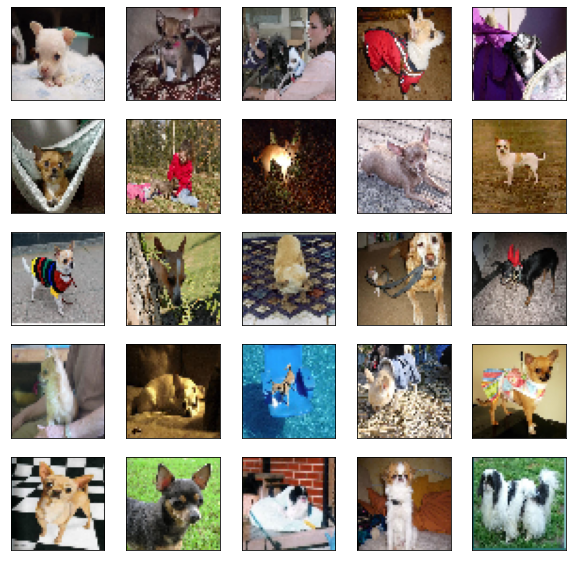

In [9]:
plt.figure(figsize=(10,10))

for i in range(100, 125):
    plt.subplot(5,5,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img(i))
    #plt.xlabel(load_label(i))
    
plt.show()

In [71]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [72]:
train_gen = train_datagen.flow_from_directory(
    '../data/train', 
    target_size=(150, 150), 
    batch_size=20, 
    classes=[*race_dirs]
)


Found 16469 images belonging to 120 classes.


In [73]:
val_gen = val_datagen.flow_from_directory(
    '../data/valid', 
    target_size=(150, 150), 
    batch_size=20, 
    classes=[*race_dirs]
)

Found 4111 images belonging to 120 classes.


In [74]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [75]:
imgs, labels = next(val_gen)

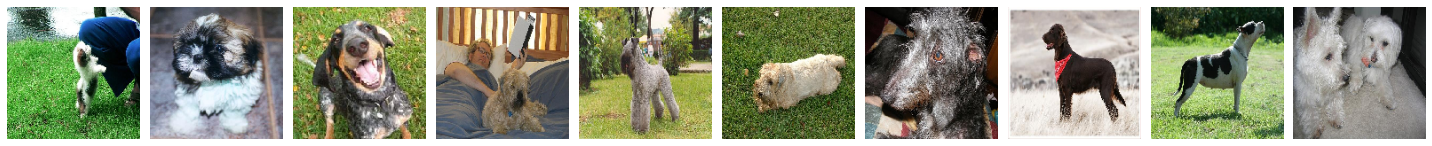

In [76]:
plotImages(imgs)

In [80]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [82]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [83]:
history = model.fit(train_gen, epochs=15, steps_per_epoch=823, 
                   validation_data=val_gen, validation_steps=205)

Epoch 1/15
823/823 [==============================] - 74s 89ms/step - loss: 4.8973 - acc: 0.0129 - val_loss: 4.4233 - val_acc: 0.0366
Epoch 2/15
823/823 [==============================] - 65s 79ms/step - loss: 4.4728 - acc: 0.0354 - val_loss: 4.2258 - val_acc: 0.0637
Epoch 3/15
823/823 [==============================] - 65s 79ms/step - loss: 4.2936 - acc: 0.0594 - val_loss: 4.1615 - val_acc: 0.0761
Epoch 4/15
823/823 [==============================] - 65s 79ms/step - loss: 4.1671 - acc: 0.0730 - val_loss: 4.0751 - val_acc: 0.0805
Epoch 5/15
823/823 [==============================] - 65s 79ms/step - loss: 4.1020 - acc: 0.0802 - val_loss: 4.1472 - val_acc: 0.0776
Epoch 6/15
823/823 [==============================] - 64s 77ms/step - loss: 4.0648 - acc: 0.0854 - val_loss: 3.9403 - val_acc: 0.0973
Epoch 7/15
823/823 [==============================] - 64s 77ms/step - loss: 4.0139 - acc: 0.0938 - val_loss: 3.9685 - val_acc: 0.0983
Epoch 8/15
823/823 [==============================] - 64s 77ms

In [95]:
model.save('models/dogs_dataset_big.h5')

In [96]:
#from tensorflow.keras.models import load_model
#model = load_model('models/dogs_dataset_big.h5')

Text(0.5, 1.0, 'Training and validation loss')

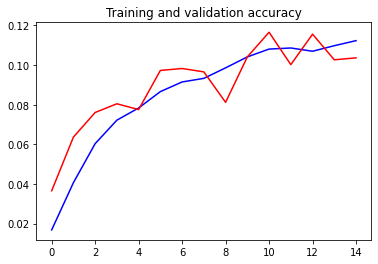

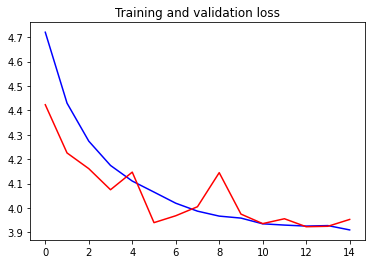

In [86]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, "b")
plt.plot(epochs, val_acc, "r")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title('Training and validation loss')

In [93]:
#ResNet50_model = ResNet50(weights='imagenet')

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(150, 150, 3))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    #x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(img, axis=0)

def ResNet50_predict_labels(img_path):
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [88]:
def dog_detector(img_path):
    # Detect if an image has a dog or not
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [23]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
#face_cascade = cv2.CascadeClassifier('D:\opencv\data\haarcascades\haarcascade_frontalface_default.xml')

In [24]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [25]:
face_detector('shutterstock_149962697-946x658.jpg')

True

In [26]:
dog_detector('Chien-moche-qui-ressemble-a-un-rat.jpg')

True

In [27]:
def display_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot
def predict_breed(img_path):
    display_img(img_path)
    if dog_detector(img_path):
        print("IT IS A DOGGO WOOF")
    elif face_detector(img_path):
        print("IS NOT DOG, IS HUMAN! IMPOSTOR, SUS!")

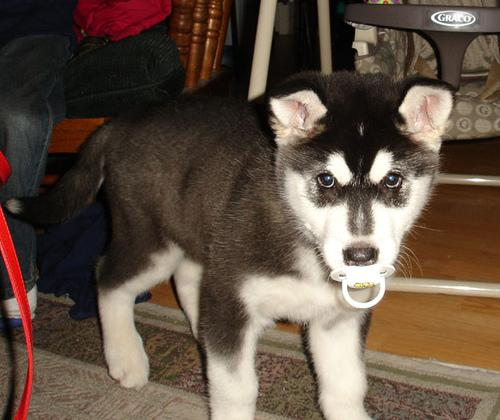

In [156]:
image.load_img('../data/train/n02110063-malamute/n02110063_14382.jpg')

In [85]:
#def get_corresponding_doggo(): TODO

In [111]:
single_pred = model.predict(path_to_tensor('../data/train/n02108000-EntleBucher/n02108000_1167.jpg'))
np.argmax(single_pred)

28

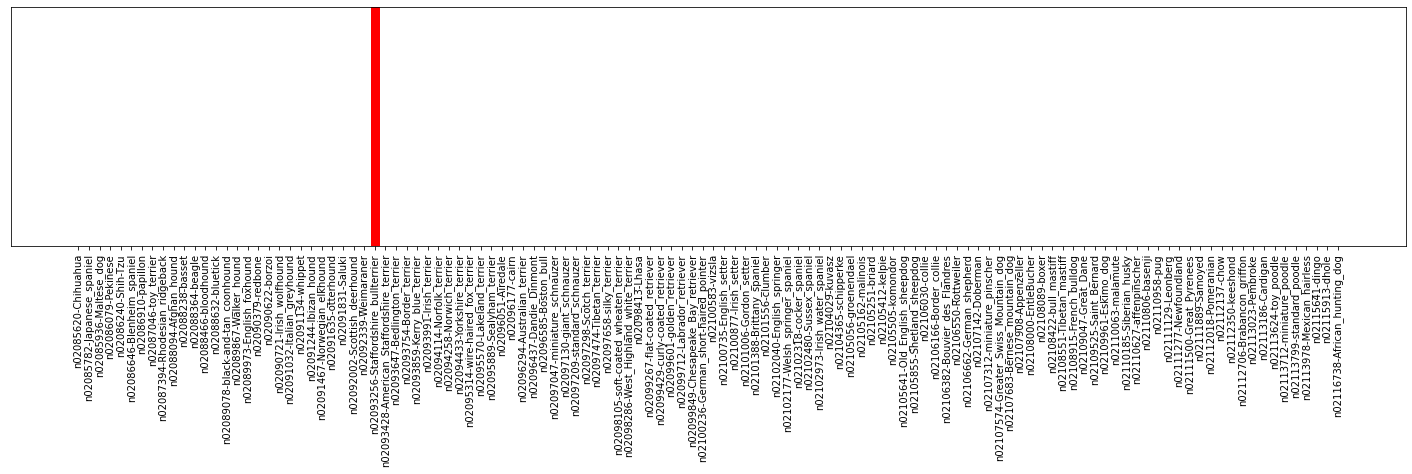

In [108]:
def plot_value_array(i, predictions_array, true_label):
    true_label =  true_label[i]
    #true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(120))
    plt.yticks([])
    thisplot = plt.bar(x=range(120), height=predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

plt.figure(figsize=(25, 15))
plt.subplot(3, 1, 1)
plot_value_array(6, single_pred[0], race_dirs_indexed)
_ = plt.xticks(range(120), race_dirs, rotation=90)

'n02085620-Chihuahua'

In [ ]:
train_mat = loadmat('./train_data.mat')
test_mat = loadmat('./test_data.mat')
print(train_mat.keys())
print(test_mat.keys())

In [ ]:
train_mat_train_info = pd.DataFrame(train_mat.get('train_info'))
test_mat_train_info = pd.DataFrame(train_mat.get('test_fg_data'))

In [ ]:
train_mat_train_info

In [ ]:
test_mat_train_info

In [ ]:
for i in train_mat_train_info.columns:
    column = np.array(train_mat_train_info[i].values.tolist())
    train_mat_train_info[i] = column
    
for i in test_mat_train_info.columns:
    column = np.array(test_mat_train_info[i].values.tolist())
    test_mat_train_info[i] = column

In [ ]:
print(train_mat_train_info.columns)
print(test_mat_train_info.columns)

In [ ]:
labels_distinct = train_mat_train_info.drop_duplicates(['labels'])
class_names = []
for i in labels_distinct:
    dog_race = re.match(r'^\w+-(.+)\/\w+$', i).group(1)
    class_names.append(dog_race)
    print(dog_race)

In [ ]:
class_names

In [ ]:
train_mat_train_info = train_mat_train_info.drop_duplicates(['labels'])

In [ ]:
def load_img(i):
    img = "./dogs-dataset-images/" + train_mat_train_info.file_list[i]
    img = tf.keras.preprocessing.image.load_img(img, target_size=(50,50))
    return img

def load_label(i):
    label_index = train_mat_train_info.labels[i]
    label_race = class_names[label_index-1]
    
    return "{} [{}]".format(label_race, label_index)

In [ ]:
plt.figure(figsize=(10,10))

for i in range(100, 125):
    plt.subplot(5,5,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img(i))
    plt.xlabel(load_label(i))
    
plt.show()